,Speech,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1
...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 548ms/step - accuracy: 0.5259 - loss: 2.4965 - val_accuracy: 0.5673 - val_loss: 2.2342
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.5517 - loss: 2.1703 - val_accuracy: 0.5192 - val_loss: 1.9571
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - accuracy: 0.5963 - loss: 1.8835 - val_accuracy: 0.6250 - val_loss: 1.7018
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6611 - loss: 1.6225 - val_accuracy: 0.6635 - val_loss: 1.4808
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - accuracy: 0.7217 - loss: 1.3820 - val_accuracy: 0.6875 - val_loss: 1.2847
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.7804 - loss: 1.1516 - val_accuracy: 0.7212 - val_loss: 1.0894
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.8702 - loss: 0.9075 - val_accuracy: 0.8413 - val_loss: 0.9103
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.9314 - loss: 0.6919 - val_accuracy: 0.8413 - val_loss: 0.

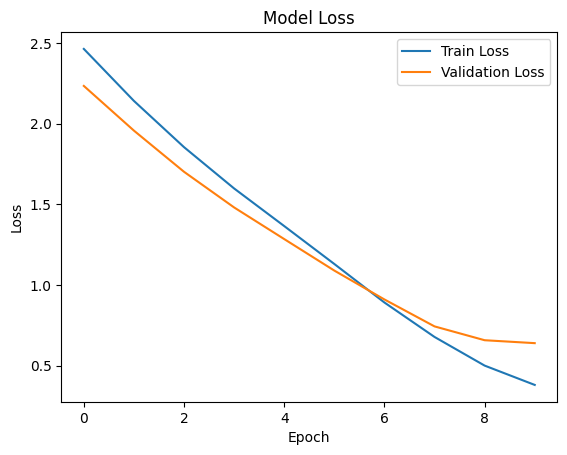

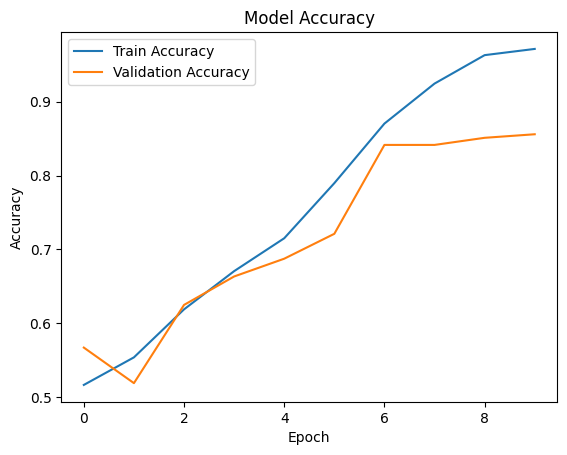

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9860 - loss: 0.3131 
The train accuracy is: 98.68%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8558 - loss: 0.6395
The test accuracy is: 85.58%


In [ ]:
# Now run your main script
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Data import
df = pd.read_csv('food_review_01.csv')
display(df)

# Visualize the distribution of labels
#sns.countplot(df['Label'])
#plt.show()

# Data Preprocessing
def replace_strings(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def remove_punctuations(my_str):
    punctuations = '''!()-[]{};:'"“\’,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct += char
    return no_punct

def preprocessing(text):
    return remove_punctuations(replace_strings(text))

# Apply preprocessing to the 'Speech' column
df['Speech'] = df['Speech'].apply(lambda x: preprocessing(str(x)))
df.reset_index(drop=True, inplace=True)

# Splitting data into training and testing sets
train1, test1 = train_test_split(df, random_state=69, test_size=0.2)

# Extract sentences and labels
train_sentences = train1['Speech'].values
train_labels = train1['Label'].values

test_sentences = test1['Speech'].values
test_labels = test1['Label'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=100)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=100)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

# Define the model
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(5000, 300, input_length=100))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
# Train the model without use_multiprocessing and workers parameters
history = model.fit(train_padded, train_labels, epochs=10, batch_size=256, validation_data=(test_padded, test_labels))

# Plot model loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

# Plot model accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

# Calculate training and testing accuracy
train_loss, train_accuracy = model.evaluate(train_padded, train_labels, batch_size=256)
print(f"The train accuracy is: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(test_padded, test_labels, batch_size=256)
print(f"The test accuracy is: {test_accuracy * 100:.2f}%")


In [ ]:
# Train KNN model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, train_labels)

# Predict on training data
train_predictions = knn_classifier.predict(X_train_tfidf)
# Calculate training accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"KNN training accuracy: {train_accuracy * 100:.2f}%")

# Predict on test data
test_predictions = knn_classifier.predict(X_test_tfidf)
# Calculate testing accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"KNN testing accuracy: {test_accuracy * 100:.2f}%")

KNN training accuracy: 69.95%
KNN testing accuracy: 61.06%


,Review,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1
...,...,...
1098,রেসিপি তো সুন্দর হয়েছেই তোমার ডেকোরেশনটা অসাধ...,1
1099,আমি বানিয়েছিলাম একটু ও পুড়ে নি খুব ভালো হয়েছিল,1
1100,মজাদার পাস্তা,1
1101,আমার বাচ্চারা খুব পছন্দ করে এই পাস্তা টা। খুব ...,1


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4813 - loss: 1.4660 - val_accuracy: 0.4299 - val_loss: 1.4289
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5039 - loss: 1.4189 - val_accuracy: 0.5701 - val_loss: 1.3772
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4935 - loss: 1.3777 - val_accuracy: 0.5701 - val_loss: 1.3374
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4882 - loss: 1.3339 - val_accuracy: 0.5701 - val_loss: 1.2926
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5159 - loss: 1.2910 - val_accuracy: 0.5701 - val_loss: 1.2570
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4800 - loss: 1.2559 - val_accuracy: 0.5701 - val_loss: 1.2236
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5175 - loss: 1.2175 - val_accuracy: 0.5701 - val_loss: 1.1901
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5110 - loss: 1.1843 - val_accuracy: 0.5701 - val_loss: 1.1563
Epoch 9/10
4/4 ━━━━━━━━━━

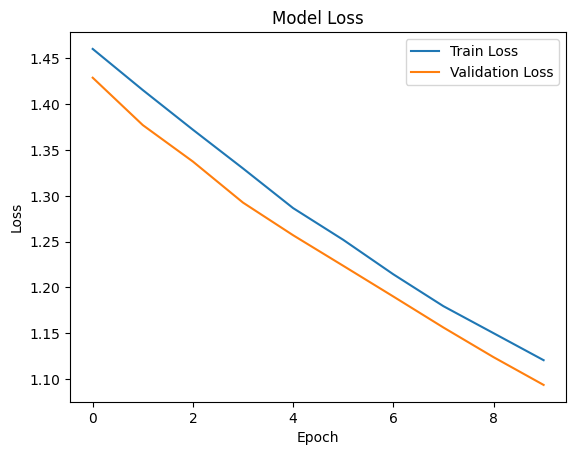

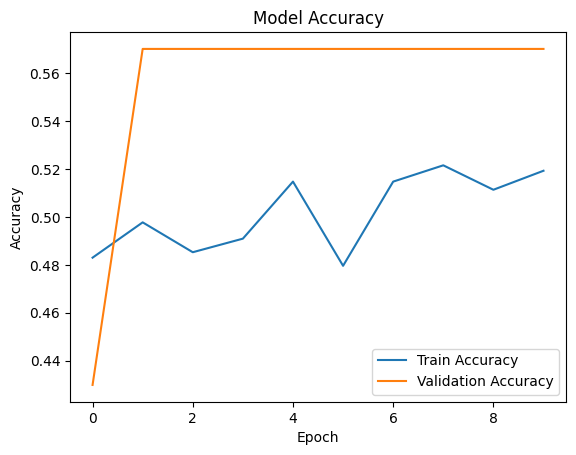

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.5219 - loss: 1.0982
The train accuracy is: 51.70%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5701 - loss: 1.0936
The test accuracy is: 57.01%
KNN training accuracy: 64.85%
KNN testing accuracy: 60.18%


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Data import
df = pd.read_csv('Food Review.csv')
display(df)

# Visualize the distribution of labels
# sns.countplot(df['Label'])
# plt.show()

# Data Preprocessing
def replace_strings(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def remove_punctuations(my_str):
    punctuations = '''!()-[]{};:'"“\’,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct += char
    return no_punct

def preprocessing(text):
    return remove_punctuations(replace_strings(text))

# Apply preprocessing to the 'Review' column
df['Review'] = df['Review'].apply(lambda x: preprocessing(str(x)))
df.reset_index(drop=True, inplace=True)

# Splitting data into training and testing sets
train1, test1 = train_test_split(df, random_state=69, test_size=0.2)

# Extract sentences and labels
train_sentences = train1['Review'].values
train_labels = train1['Label'].values

test_sentences = test1['Review'].values
test_labels = test1['Label'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=100)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=100)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

# Define the model with LSTM
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(5000, 300, input_length=100))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, batch_size=256, validation_data=(test_padded, test_labels))

# Plot model loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

# Plot model accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

# Calculate training and testing accuracy
train_loss, train_accuracy = model.evaluate(train_padded, train_labels, batch_size=256)
print(f"The train accuracy is: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(test_padded, test_labels, batch_size=256)
print(f"The test accuracy is: {test_accuracy * 100:.2f}%")

# Train KNN model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, train_labels.argmax(axis=1))  # Use argmax to convert one-hot to class indices

# Predict on training data
train_predictions = knn_classifier.predict(X_train_tfidf)
# Calculate training accuracy
train_accuracy = accuracy_score(train_labels.argmax(axis=1), train_predictions)
print(f"KNN training accuracy: {train_accuracy * 100:.2f}%")

# Predict on test data
test_predictions = knn_classifier.predict(X_test_tfidf)
# Calculate testing accuracy
test_accuracy = accuracy_score(test_labels.argmax(axis=1), test_predictions)
print(f"KNN testing accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data import
df = pd.read_csv('Food Review.csv')

# Data Preprocessing
def replace_strings(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def remove_punctuations(my_str):
    punctuations = '''!()-[]{};:'"“\’,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct += char
    return no_punct

def preprocessing(text):
    return remove_punctuations(replace_strings(text))

# Apply preprocessing to the 'Review' column
df['Review'] = df['Review'].apply(lambda x: preprocessing(str(x)))
df.reset_index(drop=True, inplace=True)

# Splitting data into training and testing sets
train1, test1 = train_test_split(df, random_state=69, test_size=0.2)

# Extract sentences and labels
train_sentences = train1['Review'].values
train_labels = train1['Label'].values
test_sentences = test1['Review'].values
test_labels = test1['Label'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=100)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=100)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5186 - loss: 2.5041 - val_accuracy: 0.5973 - val_loss: 2.2337
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.6162 - loss: 2.1707 - val_accuracy: 0.6561 - val_loss: 1.9446
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 672ms/step - accuracy: 0.6549 - loss: 1.8838 - val_accuracy: 0.6471 - val_loss: 1.6951
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.7189 - loss: 1.6156 - val_accuracy: 0.6742 - val_loss: 1.4639
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7128 - loss: 1.3863 - val_accuracy: 0.6787 - val_loss: 1.2715
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 744ms/step - accuracy: 0.7949 - loss: 1.1359 - val_accuracy: 0.7285 - val_loss: 1.0757
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.8591 - loss: 0.8776 - val_accuracy: 0.8054 - val_loss: 0.8990
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.9229 - loss: 0.6364 - val_accuracy: 0.8281 - val_loss: 0.7464
Epoch 9/1

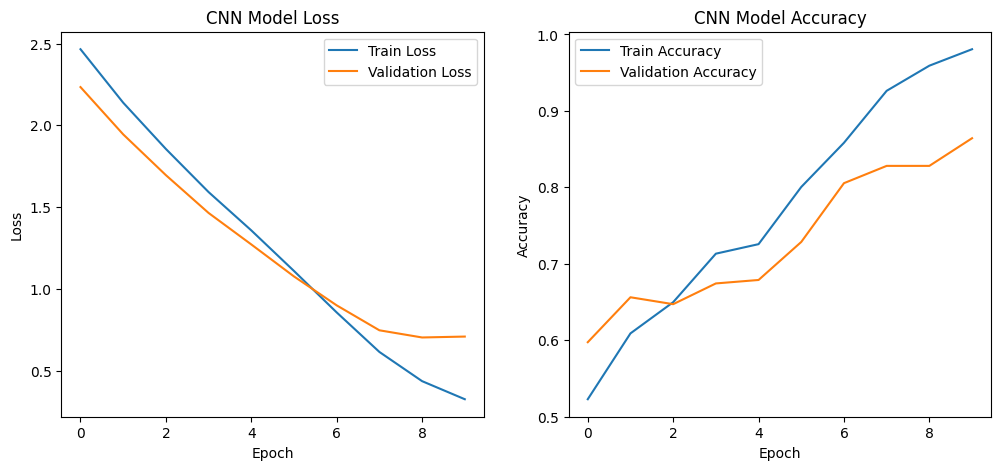

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9871 - loss: 0.2652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8643 - loss: 0.7081
CNN Training Accuracy: 98.87%
CNN Testing Accuracy: 86.43%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Embedding(5000, 300, input_length=100))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()

# Train the CNN model
cnn_history = cnn_model.fit(train_padded, train_labels, epochs=10, batch_size=256, validation_data=(test_padded, test_labels))

# Plot CNN model loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

plt.show()

# Evaluate CNN model
cnn_train_loss, cnn_train_accuracy = cnn_model.evaluate(train_padded, train_labels, batch_size=256)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_padded, test_labels, batch_size=256)
print(f"CNN Training Accuracy: {cnn_train_accuracy * 100:.2f}%")
print(f"CNN Testing Accuracy: {cnn_test_accuracy * 100:.2f}%")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4825 - loss: 1.4525 - val_accuracy: 0.5701 - val_loss: 1.4052
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5079 - loss: 1.4088 - val_accuracy: 0.5701 - val_loss: 1.3655
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5077 - loss: 1.3609 - val_accuracy: 0.5701 - val_loss: 1.3252
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5330 - loss: 1.3188 - val_accuracy: 0.5701 - val_loss: 1.2861
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5027 - loss: 1.2809 - val_accuracy: 0.5701 - val_loss: 1.2466
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5098 - loss: 1.2430 - val_accuracy: 0.5701 - val_loss: 1.2102
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4965 - loss: 1.2091 - val_accuracy: 0.5701 - val_loss: 1.1783
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5160 - loss: 1.1719 - val_accuracy: 0.5701 - val_loss: 1.1473
Epoch 9/10
4/4

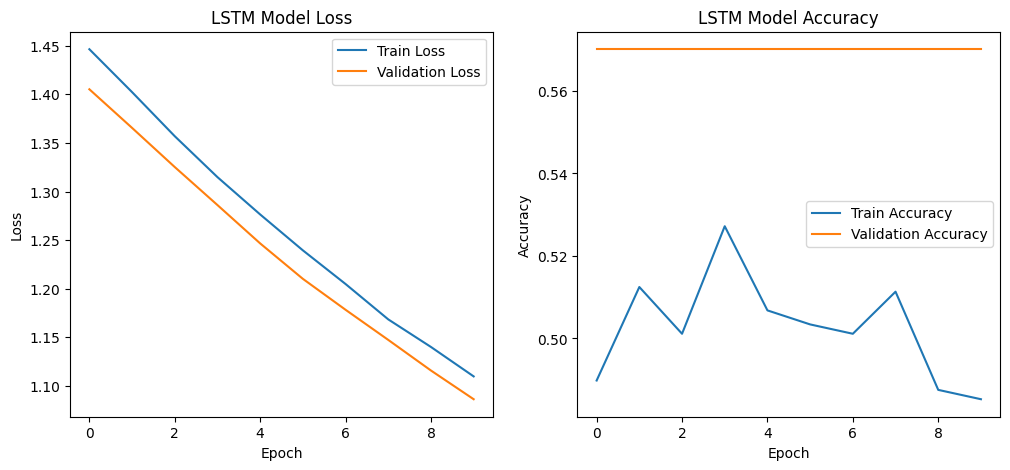

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.5219 - loss: 1.0886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5701 - loss: 1.0863
LSTM Training Accuracy: 51.70%
LSTM Testing Accuracy: 57.01%


In [ ]:
# Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(5000, 300, input_length=100))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()

# Train the LSTM model
lstm_history = lstm_model.fit(train_padded, train_labels, epochs=10, batch_size=256, validation_data=(test_padded, test_labels))

# Plot LSTM model loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'])

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

plt.show()

# Evaluate LSTM model
lstm_train_loss, lstm_train_accuracy = lstm_model.evaluate(train_padded, train_labels, batch_size=256)
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(test_padded, test_labels, batch_size=256)
print(f"LSTM Training Accuracy: {lstm_train_accuracy * 100:.2f}%")
print(f"LSTM Testing Accuracy: {lstm_test_accuracy * 100:.2f}%")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, train_labels.argmax(axis=1))  # Use argmax to convert one-hot to class indices

# Predict and evaluate KNN model
train_predictions = knn_classifier.predict(X_train_tfidf)
test_predictions = knn_classifier.predict(X_test_tfidf)

train_accuracy = accuracy_score(train_labels.argmax(axis=1), train_predictions)
test_accuracy = accuracy_score(test_labels.argmax(axis=1), test_predictions)

print(f"KNN Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"KNN Testing Accuracy: {test_accuracy * 100:.2f}%")


KNN Training Accuracy: 64.85%
KNN Testing Accuracy: 60.18%
